# INTERPOLACIÓN POLINÓMICA

---
# DIFERENCIAS DIVIDIDAS DE NEWTON
La generalización del Polinomio de Newton es el siguiente:

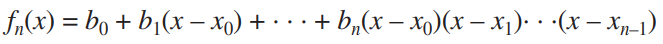

Donde cada bi contiene a las Divisiones Sucesivas que necesita el polinomio, y es denotado de la siguiente forma:

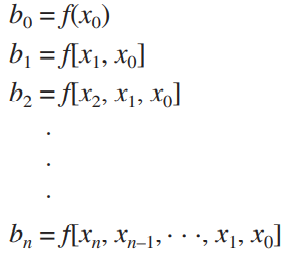

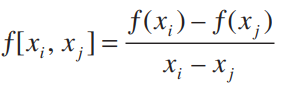

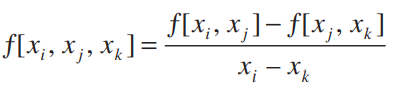

Las cuales se pueden ver mejor en una tabla:

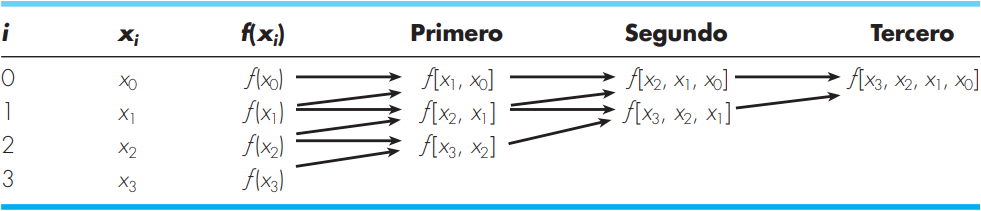

A continuación resolveremos el siguiente ejercicio de interpolación:
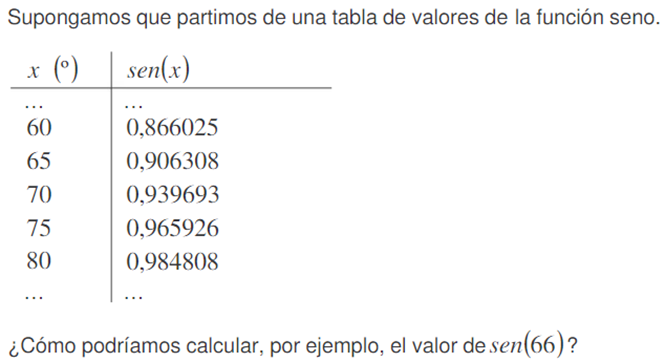

Tabla Diferencia Dividida
[['i   ', 'xi  ', 'fi  ', 'F[1]', 'F[2]', 'F[3]', 'F[4]', 'F[5]']]
[[ 0.0000e+00  6.0000e+01  8.6603e-01  8.0566e-03 -1.3796e-04 -3.3867e-07
   3.6667e-09  0.0000e+00]
 [ 1.0000e+00  6.5000e+01  9.0631e-01  6.6770e-03 -1.4304e-04 -2.6533e-07
   0.0000e+00  0.0000e+00]
 [ 2.0000e+00  7.0000e+01  9.3969e-01  5.2466e-03 -1.4702e-04  0.0000e+00
   0.0000e+00  0.0000e+00]
 [ 3.0000e+00  7.5000e+01  9.6593e-01  3.7764e-03  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00]
 [ 4.0000e+00  8.0000e+01  9.8481e-01  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00]]
D. Dividida: [ 8.0566e-03 -1.3796e-04 -3.3867e-07  3.6667e-09  0.0000e+00]
Polinomio: 0.00805659999999999*x + 3.66666666668338e-9*(x - 75)*(x - 70)*(x - 65)*(x - 60) - 3.38666666666784e-7*(x - 70)*(x - 65)*(x - 60) - 0.000137959999999999*(x - 65)*(x - 60) + 0.382629000000001
Polinomio simplificado: 3.66666666668338e-9*x**4 - 1.3286666666713e-6*x**3 + 2.80883333338129e-5*x**2 + 0.0165377166666447*x 

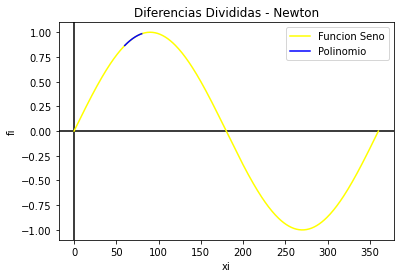

In [1]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

def Newton(xi, fi):
  # PROCEDIMIENTO

  # Tabla de Diferencias Divididas Avanzadas
  titulo = ['i   ','xi  ','fi  ']
  n = len(xi)
  ki = np.arange(0,n,1)
  tabla = np.concatenate(([ki],[xi],[fi]),axis=0)
  tabla = np.transpose(tabla)

  # diferencias divididas vacia
  dfinita = np.zeros(shape=(n,n),dtype=float)
  tabla = np.concatenate((tabla,dfinita), axis=1)

  # Calcula tabla, inicia en columna 3
  [n,m] = np.shape(tabla)
  diagonal = n-1
  j = 3
  while (j < m):
      # Añade título para cada columna
      titulo.append('F['+str(j-2)+']')

      # cada fila de columna
      i = 0
      paso = j-2 # inicia en 1
      while (i < diagonal):
          denominador = (xi[i+paso]-xi[i])
          numerador = tabla[i+1,j-1]-tabla[i,j-1]
          tabla[i,j] = numerador/denominador
          i = i+1
      diagonal = diagonal - 1
      j = j+1

  # POLINOMIO con diferencias Divididas
  # caso: puntos equidistantes en eje x
  dDividida = tabla[0,3:]
  n = len(dfinita)

  # expresión del polinomio con Sympy
  x = sym.Symbol('x')
  polinomio = fi[0]
  for j in range(1,n,1):
      factor = dDividida[j-1]
      termino = 1
      for k in range(0,j,1):
          termino = termino*(x-xi[k])
      polinomio = polinomio + termino*factor

  # simplifica multiplicando entre (x-xi)
  polisimple = polinomio.expand()

  # polinomio para evaluacion numérica
  px = sym.lambdify(x,polisimple)

  # Puntos para la gráfica
  muestras = 101
  a = np.min(xi)
  b = np.max(xi)
  pxi = np.linspace(a,b,muestras)
  pfi = px(pxi)

  # SALIDA
  np.set_printoptions(precision = 4)
  print('Tabla Diferencia Dividida')
  print([titulo])
  print(tabla)
  print('D. Dividida:', dDividida)
  print('Polinomio:', polinomio)
  print('Polinomio simplificado:', polisimple)

  print("Interpolacion cuando x = 66: ", px(66))
  print("Solución verdadera:", np.sin(np.radians(66)))

  xr = np.linspace(0, 360, 361)
  yr = np.sin(np.radians(xr))

  # Gráfica
  plt.axhline(0, color="black")
  plt.axvline(0, color="black")
  plt.plot(xr, yr, label = 'Funcion Seno', color = 'yellow')
  plt.plot(pxi,pfi, label = 'Polinomio', color = 'blue')
  plt.legend()
  plt.xlabel('xi')
  plt.ylabel('fi')
  plt.title('Diferencias Divididas - Newton')
  plt.show()

# INGRESO , Datos de prueba
xi = np.array([60,65,70,75,80])
fi = np.array([0.866025,0.906308,0.939693,0.965926,0.984808])

Newton(xi, fi)

# POLINOMIOS DE LAGRANJE
Es una reformulación del Polinomio de Newton, sustituyendo a las Diferencias Divididas por los Interpoladores de Lagrange:

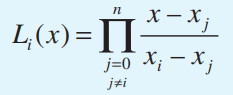

Los polinomios de Lagrange son denotados de la siguite forma:

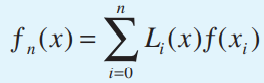

Valores de x:  [60 65 70 75 80]
Imagenes de x:  [0.866  0.9063 0.9397 0.9659 0.9848]
Divisores en L(i): [15000. -3750.  2500. -3750. 15000.]
Polinomio:  5.7735e-5*(x - 80)*(x - 75)*(x - 70)*(x - 65) - 0.000241682133333333*(x - 80)*(x - 75)*(x - 70)*(x - 60) + 0.0003758772*(x - 80)*(x - 75)*(x - 65)*(x - 60) - 0.000257580266666667*(x - 80)*(x - 70)*(x - 65)*(x - 60) + 6.56538666666667e-5*(x - 75)*(x - 70)*(x - 65)*(x - 60)
Polinomio Simplificado:  3.66666666671536e-9*x**4 - 1.32866666667508e-6*x**3 + 2.80883333330095e-5*x**2 + 0.016537716666619*x + 0.0121160000026066
Interpolacion cuando x = 66:  0.9135457599965551
Solución verdadera: 0.9135454576426009


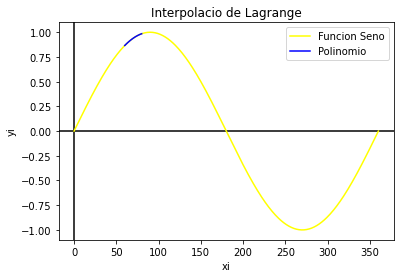

In [2]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

def Lagrange(xi, fi):
  #Polinomio de Lagrange
  n = len(xi)
  x = sym.Symbol('x')

  polinomio = 0
  divisorL = np.zeros(n, dtype = float)
  for i in range(0, n, 1):
      #Terminos de Lagrange
      numerador = 1
      denominador = 1
      for j in range(0, n, 1):
          if(j != i):
              numerador = numerador * (x - xi[j])
              denominador = denominador * (xi[i] - xi[j])
      terminoLi = numerador/denominador
      polinomio = polinomio + terminoLi * fi[i]
      divisorL[i] = denominador

  #Simplifica polinomio
  polisimple = polinomio.expand()

  #Para la evaluacion numerica
  px = sym.lambdify(x, polisimple)

  #Puntos de la grafica
  muestras = 101
  a = np.min(xi)
  b = np.max(xi)
  pxi = np.linspace(a, b, muestras)
  pfi = px(pxi)

  print("Valores de x: ", xi)
  print("Imagenes de x: ", fi)
  print("Divisores en L(i):", divisorL)

  print("Polinomio: ", polinomio)
  print("Polinomio Simplificado: ", polisimple)

  print("Interpolacion cuando x = 66: ", px(66))
  print("Solución verdadera:", np.sin(np.radians(66)))

  xr = np.linspace(0, 360, 361)
  yr = np.sin(np.radians(xr))

  # Gráfica
  plt.axhline(0, color="black")
  plt.axvline(0, color="black")
  plt.plot(xr, yr, label = 'Funcion Seno', color = 'yellow')
  plt.plot(pxi,pfi, label = 'Polinomio', color = 'blue')
  plt.legend()
  plt.xlabel('xi')
  plt.ylabel('yi')
  plt.title('Interpolacio de Lagrange')
  plt.show()

xi = np.array([60,65,70,75,80])
fi = np.array([0.866025,0.906308,0.939693,0.965926,0.984808])

Lagrange(xi, fi)